# Importação das Bibliotecas Necessárias

In [18]:
from ultralytics import YOLO
from test import dir_images
import matplotlib.pyplot as plt
from os.path import join, basename

# Carregando um modeno YOLO V9 pre-treinado

In [13]:
model = YOLO('yolov9c.pt')

# Definição de Classes que o modelo conhece e que estão no dataset

In [3]:
valid_animals = ["cow","ox","sheep","horse","goat","duck","dog","cat","bird", "swan", "rat", "pig", "pigeon", "fox"]

# Pegando o caminho de todas as imagens

In [9]:
files = dir_images(join("animals","animals","cow"),False)[0:10]


In [10]:
# checando quantos arquivos buscamos
#len(files)
print(files)

['animals\\animals\\cow\\05768d38ec.jpg', 'animals\\animals\\cow\\066fdf665a.jpg', 'animals\\animals\\cow\\098c4da6d0.jpg', 'animals\\animals\\cow\\0bc9244dbf.jpg', 'animals\\animals\\cow\\0dc9f0e83d.jpg', 'animals\\animals\\cow\\128fc39904.jpg', 'animals\\animals\\cow\\129dd77ad8.jpg', 'animals\\animals\\cow\\177bc31f99.jpg', 'animals\\animals\\cow\\17a29c13f5.jpg', 'animals\\animals\\cow\\1bdb6f9696.jpg']


# Podemos Visualizar as Imagens Buscadas

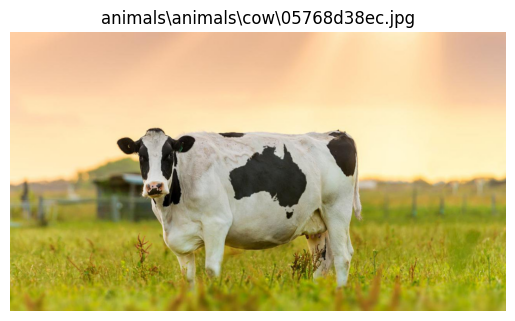

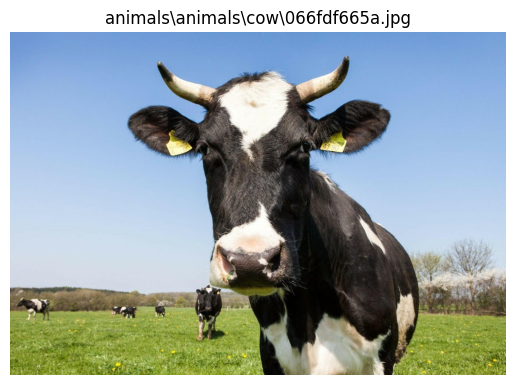

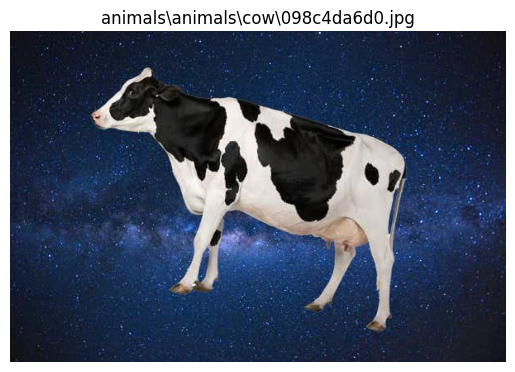

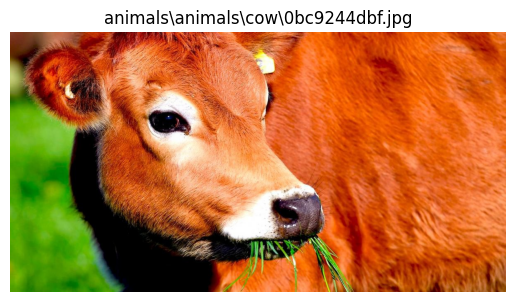

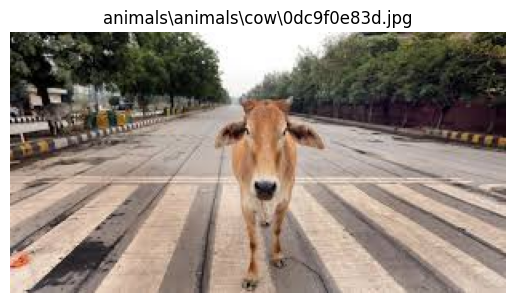

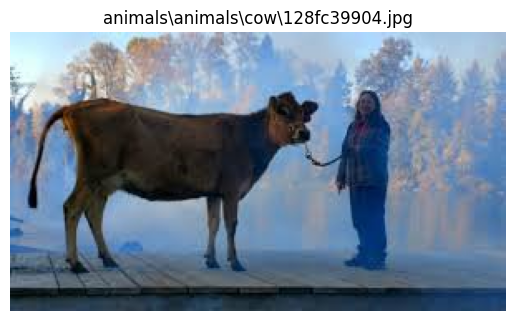

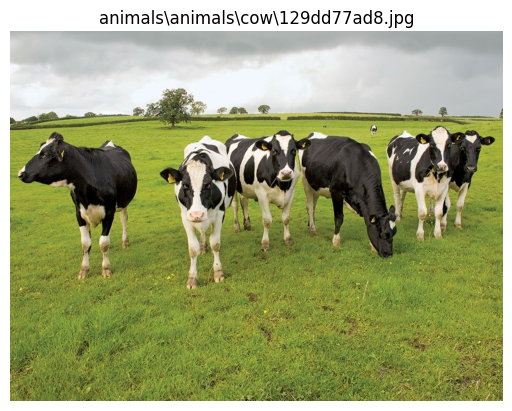

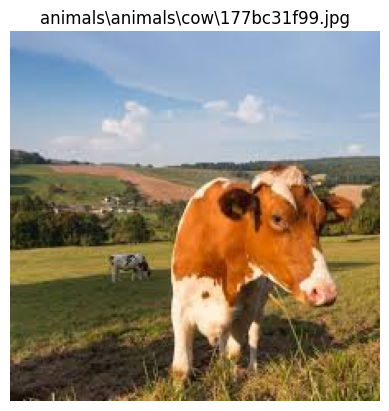

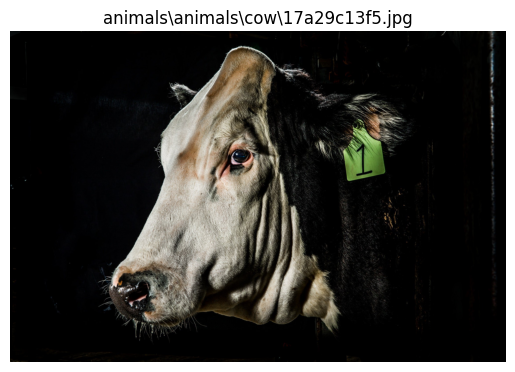

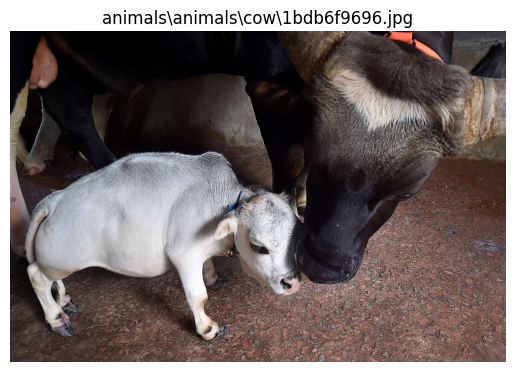

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Lista de nomes de arquivos de imagem


# Loop sobre cada imagem
for nome in files:
    # Lê a imagem
    imagem = mpimg.imread(nome)
    
    # Mostra a imagem
    plt.imshow(imagem)
    
    # Adiciona um título com o nome do arquivo
    plt.title(nome)
    
    # Remove os eixos
    plt.axis('off')
    
    # Exibe a imagem
    plt.show()


# Realizando a Predição do Modelo

In [14]:
results = model(files)


0: 640x640 1 cow, 689.3ms
1: 640x640 6 cows, 689.3ms
2: 640x640 1 cow, 689.3ms
3: 640x640 3 cows, 689.3ms
4: 640x640 1 cow, 689.3ms
5: 640x640 1 person, 1 cow, 689.3ms
6: 640x640 7 cows, 689.3ms
7: 640x640 2 cows, 689.3ms
8: 640x640 1 cow, 689.3ms
9: 640x640 2 cows, 689.3ms
Speed: 4.9ms preprocess, 689.3ms inference, 224.0ms postprocess per image at shape (1, 3, 640, 640)


# Processando o Objeto results que o Modelo retorna em um Dicionário de Dicionários, onda cada imagem é uma chave maior que contem seus dados dentro
Os dados são compostos por:
- Boxes da detecção
- Confiança de cada detecção
- Id usado pelo modelo
- Nome da Classe
- Contagem de Ocorrencia de cada classe

In [51]:
predicts = {}
for id, result in enumerate(results,0):
    dic = {}
    dic["boxes"] = result.boxes  # Boxes object for bounding box outputs
    dic["confidences"] = [conf.item() for conf in result.boxes.conf] #obtenho o percentual de confiação sobre a detecção
    dic["class_ids"] = [cls.item() for cls in result.boxes.cls] # Obtenho o ID do item detectado (vulgo classe)
    dic["class_names"] = [result.names[key] for key in dic["class_ids"]] #obtenho o nome de todas as classes que o modelo detectou
    dic["counting_class"] = {nome: dic["class_names"].count(nome) for nome in set(dic["class_names"])}
    
    #dic["classes"] = [cls for cls in result.boxes.cls] # Obtenho o tensor de saida
    #dic["confidences"] = [conf for conf in result.boxes.conf] #obtenho o tensor de saida
    #dic["names"] = result.names #obtenho o nome de todas as classes que o modelo conhece
    #dic["masks"] = result.masks  # Masks object for segmentation masks outputs
    #dic["keypoints"] = result.keypoints  # Keypoints object for pose outputs
    #dic["probs"] = result.probs  # Probs object for classification outputs
    #result.show()  # display to screen
    #result.save(filename='result.jpg')  # save to disk

    predicts[files[id]] = dic

In [52]:
for dic in predicts.values():
    print(f"R:\nNames: {dic["class_names"]} \nClass: {dic["class_ids"]}\n Conf: {dic["confidences"]}\nCounting: {dic["counting_class"]}\n\n")

R:
Names: ['cow'] 
Class: [19.0]
 Conf: [0.9546709656715393]
Counting: {'cow': 1}


R:
Names: ['cow', 'cow', 'cow', 'cow', 'cow', 'cow'] 
Class: [19.0, 19.0, 19.0, 19.0, 19.0, 19.0]
 Conf: [0.9707778692245483, 0.902886688709259, 0.8650025725364685, 0.731736421585083, 0.6785827279090881, 0.5329352021217346]
Counting: {'cow': 6}


R:
Names: ['cow'] 
Class: [19.0]
 Conf: [0.9555909037590027]
Counting: {'cow': 1}


R:
Names: ['cow', 'cow', 'cow'] 
Class: [19.0, 19.0, 19.0]
 Conf: [0.8135783076286316, 0.6848966479301453, 0.5335001945495605]
Counting: {'cow': 3}


R:
Names: ['cow'] 
Class: [19.0]
 Conf: [0.9208269119262695]
Counting: {'cow': 1}


R:
Names: ['cow', 'person'] 
Class: [19.0, 0.0]
 Conf: [0.955710232257843, 0.9021695852279663]
Counting: {'cow': 1, 'person': 1}


R:
Names: ['cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow'] 
Class: [19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0]
 Conf: [0.9468133449554443, 0.9414027333259583, 0.9359992742538452, 0.9308652877807617, 0.9100774526596069, 0